 # <i> Data cleaning, Exploratory data analysis, Data visualization on zomato dataset</i>

## <b> Data Cleaning</b>

In [43]:
# importing libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sb

In [14]:
#loading zomato dataset
original_df = pd.read_csv("zomato.csv")
#Top 5 values in a dataset
original_df.head()

,url,address,name,online_order,book_table,rate,votes,phone,location,rest_type,dish_liked,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,https://www.zomato.com/bangalore/jalsa-banasha...,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,080 42297555\r\n+91 9743772233,Banashankari,Casual Dining,"Pasta, Lunch Buffet, Masala Papad, Paneer Laja...","North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,https://www.zomato.com/bangalore/spice-elephan...,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,080 41714161,Banashankari,Casual Dining,"Momos, Lunch Buffet, Chocolate Nirvana, Thai G...","Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,https://www.zomato.com/SanchurroBangalore?cont...,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,+91 9663487993,Banashankari,"Cafe, Casual Dining","Churros, Cannelloni, Minestrone Soup, Hot Choc...","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,https://www.zomato.com/bangalore/addhuri-udupi...,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,+91 9620009302,Banashankari,Quick Bites,Masala Dosa,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,https://www.zomato.com/bangalore/grand-village...,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,+91 8026612447\r\n+91 9901210005,Basavanagudi,Casual Dining,"Panipuri, Gol Gappe","North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [15]:
#summary of data
original_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51717 entries, 0 to 51716
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   url                          51717 non-null  object
 1   address                      51717 non-null  object
 2   name                         51717 non-null  object
 3   online_order                 51717 non-null  object
 4   book_table                   51717 non-null  object
 5   rate                         43942 non-null  object
 6   votes                        51717 non-null  int64 
 7   phone                        50509 non-null  object
 8   location                     51696 non-null  object
 9   rest_type                    51490 non-null  object
 10  dish_liked                   23639 non-null  object
 11  cuisines                     51672 non-null  object
 12  approx_cost(for two people)  51371 non-null  object
 13  reviews_list                 51

In [18]:
# Deleting unnecessary columns in dataset
df = original_df.drop(['url','phone','dish_liked'],axis=1);
df.head()

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,approx_cost(for two people),reviews_list,menu_item,listed_in(type),listed_in(city)
0,"942, 21st Main Road, 2nd Stage, Banashankari, ...",Jalsa,Yes,Yes,4.1/5,775,Banashankari,Casual Dining,"North Indian, Mughlai, Chinese",800,"[('Rated 4.0', 'RATED\n A beautiful place to ...",[],Buffet,Banashankari
1,"2nd Floor, 80 Feet Road, Near Big Bazaar, 6th ...",Spice Elephant,Yes,No,4.1/5,787,Banashankari,Casual Dining,"Chinese, North Indian, Thai",800,"[('Rated 4.0', 'RATED\n Had been here for din...",[],Buffet,Banashankari
2,"1112, Next to KIMS Medical College, 17th Cross...",San Churro Cafe,Yes,No,3.8/5,918,Banashankari,"Cafe, Casual Dining","Cafe, Mexican, Italian",800,"[('Rated 3.0', ""RATED\n Ambience is not that ...",[],Buffet,Banashankari
3,"1st Floor, Annakuteera, 3rd Stage, Banashankar...",Addhuri Udupi Bhojana,No,No,3.7/5,88,Banashankari,Quick Bites,"South Indian, North Indian",300,"[('Rated 4.0', ""RATED\n Great food and proper...",[],Buffet,Banashankari
4,"10, 3rd Floor, Lakshmi Associates, Gandhi Baza...",Grand Village,No,No,3.8/5,166,Basavanagudi,Casual Dining,"North Indian, Rajasthani",600,"[('Rated 4.0', 'RATED\n Very good restaurant ...",[],Buffet,Banashankari


In [21]:
#Removing duplicates
df.duplicated().sum()
df.drop_duplicates(inplace=True);

In [24]:
#Removing null values
df.isnull().sum()
df.dropna(how='any',inplace=True);

In [25]:
#summary of modified dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   address                      43499 non-null  object
 1   name                         43499 non-null  object
 2   online_order                 43499 non-null  object
 3   book_table                   43499 non-null  object
 4   rate                         43499 non-null  object
 5   votes                        43499 non-null  int64 
 6   location                     43499 non-null  object
 7   rest_type                    43499 non-null  object
 8   cuisines                     43499 non-null  object
 9   approx_cost(for two people)  43499 non-null  object
 10  reviews_list                 43499 non-null  object
 11  menu_item                    43499 non-null  object
 12  listed_in(type)              43499 non-null  object
 13  listed_in(city)              43

In [32]:
#reading columns
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'approx_cost(for two people)',
       'reviews_list', 'menu_item', 'listed_in(type)', 'listed_in(city)'],
      dtype='object')

In [34]:
# changing column names 
df = df.rename(columns={'approx_cost(for two people)':'cost','listed_in(type)':'type','listed_in(city)':'city'})
df.columns

Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

## <b>Transformations</b>

In [38]:
#changing cost to string
df['cost'] = df['cost'].astype(str)
#replacing comma with dot using lambda function
df['cost'] = df['cost'].apply(lambda x:x.replace(',','.'))
#changing cost from string to float
df['cost'] = df['cost'].astype(float)
#displaying cost
df['cost']

0        800.0
1        800.0
2        800.0
3        300.0
4        600.0
         ...  
51709    800.0
51711    800.0
51712      1.5
51715      2.5
51716      1.5
Name: cost, Length: 43499, dtype: float64

In [39]:
#summary of modified data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43499 entries, 0 to 51716
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   address       43499 non-null  object 
 1   name          43499 non-null  object 
 2   online_order  43499 non-null  object 
 3   book_table    43499 non-null  object 
 4   rate          43499 non-null  object 
 5   votes         43499 non-null  int64  
 6   location      43499 non-null  object 
 7   rest_type     43499 non-null  object 
 8   cuisines      43499 non-null  object 
 9   cost          43499 non-null  float64
 10  reviews_list  43499 non-null  object 
 11  menu_item     43499 non-null  object 
 12  type          43499 non-null  object 
 13  city          43499 non-null  object 
dtypes: float64(1), int64(1), object(12)
memory usage: 5.0+ MB


In [40]:
# Reading unique rates present in dataset
df['rate'].unique()

array(['4.1/5', '3.8/5', '3.7/5', '3.6/5', '4.6/5', '4.0/5', '4.2/5',
       '3.9/5', '3.1/5', '3.0/5', '3.2/5', '3.3/5', '2.8/5', '4.4/5',
       '4.3/5', 'NEW', '2.9/5', '3.5/5', '2.6/5', '3.8 /5', '3.4/5',
       '4.5/5', '2.5/5', '2.7/5', '4.7/5', '2.4/5', '2.2/5', '2.3/5',
       '3.4 /5', '-', '3.6 /5', '4.8/5', '3.9 /5', '4.2 /5', '4.0 /5',
       '4.1 /5', '3.7 /5', '3.1 /5', '2.9 /5', '3.3 /5', '2.8 /5',
       '3.5 /5', '2.7 /5', '2.5 /5', '3.2 /5', '2.6 /5', '4.5 /5',
       '4.3 /5', '4.4 /5', '4.9/5', '2.1/5', '2.0/5', '1.8/5', '4.6 /5',
       '4.9 /5', '3.0 /5', '4.8 /5', '2.3 /5', '4.7 /5', '2.4 /5',
       '2.1 /5', '2.2 /5', '2.0 /5', '1.8 /5'], dtype=object)

In [44]:
# Removing /5 from ratings
df = df.loc[df.rate != 'NEW']
df = df.loc[df.rate != '-'].reset_index(drop=True)
remove_slash = lambda x:x.replace('/5','') if type(x) == np.str else x
df.rate = df.rate.apply(remove_slash).str.strip().astype('float')
df['rate'].head()

0    4.1
1    4.1
2    3.8
3    3.7
4    3.8
Name: rate, dtype: float64

In [46]:
# Adjust the column names
df.name = df.name.apply(lambda x:x.title())
df.online_order.replace(('Yes','No'),('True','False'),inplace = True)
df.book_table.replace(('Yes','No'),('True','False'),inplace = True)
df.cost.unique()

array([800.  , 300.  , 600.  , 700.  , 550.  , 500.  , 450.  , 650.  ,
       400.  , 900.  , 200.  , 750.  , 150.  , 850.  , 100.  ,   1.2 ,
       350.  , 250.  , 950.  ,   1.  ,   1.5 ,   1.3 , 199.  ,   1.1 ,
         1.6 , 230.  , 130.  ,   1.7 ,   1.35,   2.2 ,   1.4 ,   2.  ,
         1.8 ,   1.9 , 180.  , 330.  ,   2.5 ,   2.1 ,   3.  ,   2.8 ,
         3.4 ,  50.  ,  40.  ,   1.25,   3.5 ,   4.  ,   2.4 ,   2.6 ,
         1.45,  70.  ,   3.2 , 240.  ,   6.  ,   1.05,   2.3 ,   4.1 ,
       120.  ,   5.  ,   3.7 ,   1.65,   2.7 ,   4.5 ,  80.  ])

In [48]:
#Encode the input variables
def encode(df):
    for column in df.columns[~df.columns.isin(['rate','cost','votes'])]:
        df[column] = df[column].factorize()[0]
    return df
df_encode = encode(df.copy())
df_encode

,address,name,online_order,book_table,rate,votes,location,rest_type,cuisines,cost,reviews_list,menu_item,type,city
0,0,0,0,0,4.1,775,0,0,0,800.0,0,0,0,0
1,1,1,0,1,4.1,787,0,0,1,800.0,1,0,0,0
2,2,2,0,1,3.8,918,0,1,2,800.0,2,0,0,0
3,3,3,1,1,3.7,88,0,2,3,300.0,3,0,0,0
4,4,4,1,1,3.8,166,1,0,4,600.0,4,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41232,3137,2699,1,1,3.7,34,25,28,204,800.0,4028,0,6,29
41233,8791,1716,1,1,2.5,81,25,28,761,800.0,21082,0,6,29
41234,8725,6532,1,1,3.6,27,25,17,240,1.5,20956,0,6,29
41235,8786,6568,1,0,4.3,236,56,17,237,2.5,21054,0,6,29


Index(['address', 'name', 'online_order', 'book_table', 'rate', 'votes',
       'location', 'rest_type', 'cuisines', 'cost', 'reviews_list',
       'menu_item', 'type', 'city'],
      dtype='object')

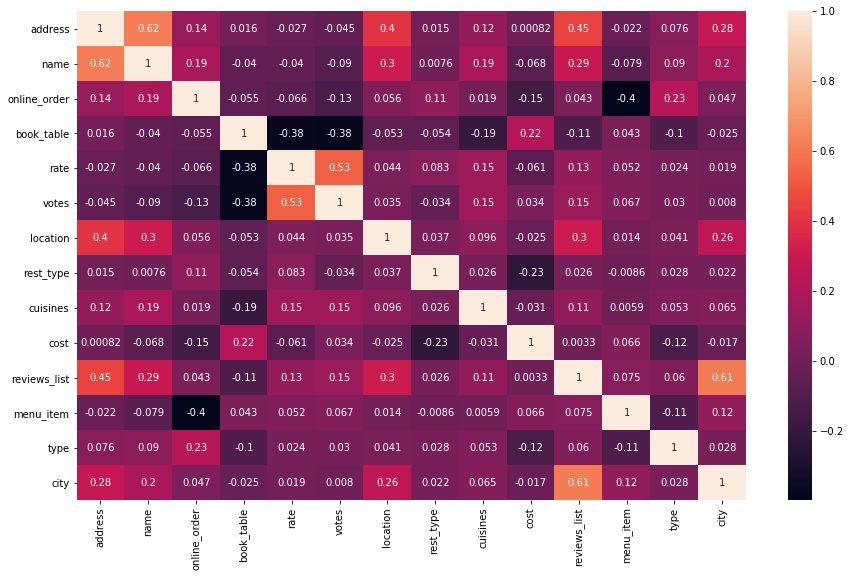

In [51]:
# Get correlation between different variables
corr = df_encode.corr(method = 'kendall')
plt.figure(figsize=(15,9))
sns.heatmap(corr,annot=True)
df_encode.columns

 The highest correalation is between address and name which is 0.62

## <b>Data Visualization</b>

<b>Restaurants delivering food online or not</b>

Text(0.5, 1.0, 'Restaurants delivering food online or not')

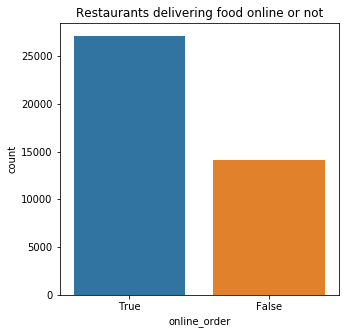

In [53]:
sns.countplot(df['online_order'])
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title ('Restaurants delivering food online or not')

<b>Restaurants allowing table booking or not</b>

Text(0.5, 1.0, 'Restaurants allowing table booking or not')

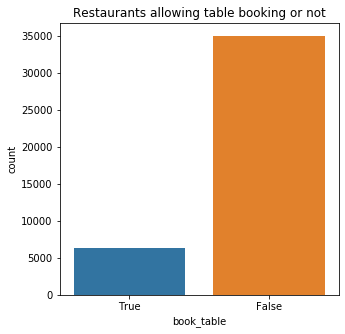

In [56]:
sns.countplot(df['book_table'])
fig = plt.gcf()
fig.set_size_inches(5,5)
plt.title('Restaurants allowing table booking or not')

<b>Table BookingRate vs Rate</b>

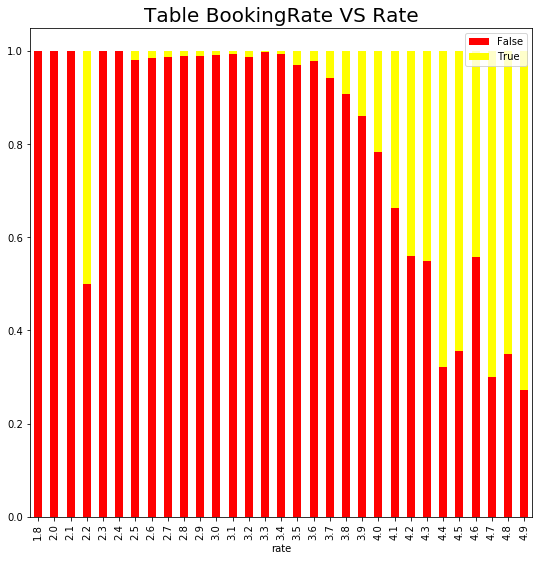

In [60]:
plt.rcParams['figure.figsize'] = (9,9)
Y = pd.crosstab(df['rate'],df['book_table'])
Y.div(Y.sum(1).astype(float),axis = 0).plot(kind = 'bar',stacked = True, color = ('red','yellow'))
plt.title('Table BookingRate VS Rate',fontweight = 30,fontsize = 20)
plt.legend(loc = "upper right")
plt.show()

<b>Best Location</b>

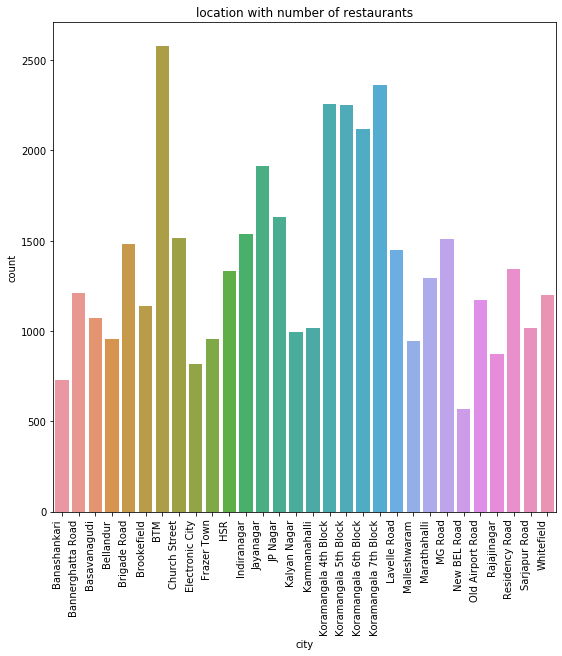

In [64]:
sns.countplot(df['city'])
sns.countplot(df['city']).set_xticklabels(sns.countplot(df['city']).get_xticklabels(),rotation=90, ha="right")
plt.title('location with number of restaurants')
plt.show()                                         

<b>Location VS Rating</b>

(array([   0.,  500., 1000., 1500., 2000., 2500., 3000., 3500., 4000.,
        4500.]),
 <a list of 10 Text yticklabel objects>)

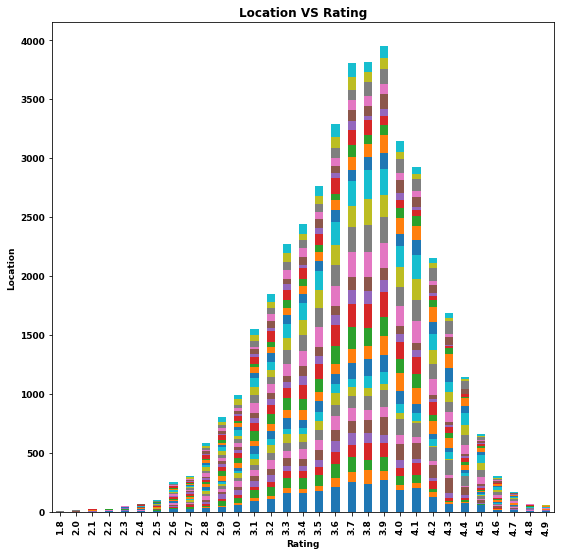

In [71]:
loc_plt = pd.crosstab(df['rate'],df['city'])
loc_plt.plot(kind = 'bar', stacked = True)
plt.title('Location VS Rating',fontsize = 12, fontweight = 'bold')
plt.ylabel('Location',fontsize= 9, fontweight = 'bold')
plt.xlabel('Rating',fontsize=9,fontweight = 'bold')
plt.legend().remove()
plt.xticks(fontsize= 9, fontweight = 'bold')
plt.yticks(fontsize= 9, fontweight = 'bold')

<b>Restaurant Type</b>

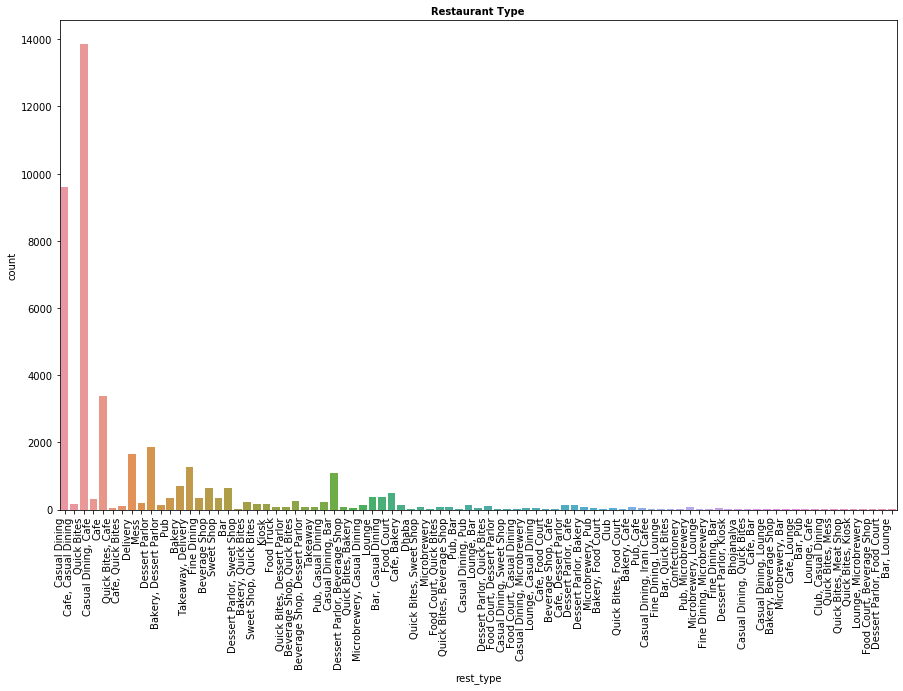

In [81]:
sns.countplot(df['rest_type'])
fig = plt.gcf()
fig.set_size_inches(15,9)
sns.countplot(df['rest_type']).set_xticklabels(sns.countplot(df['rest_type']).get_xticklabels(),rotation= 90,ha= 'right')
plt.title('Restaurant Type', fontsize = 10, fontweight = 'bold')
plt.show()

<b>Gaussian Rest type and Rating</b>

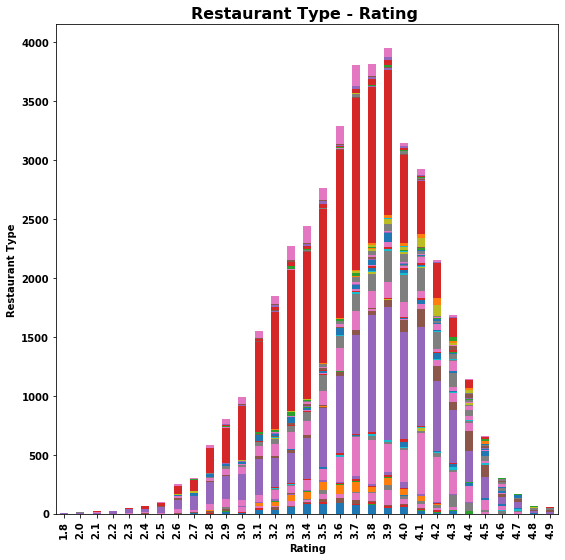

In [82]:
loc_plt = pd.crosstab(df['rate'],df['rest_type'])
loc_plt.plot(kind='bar',stacked=True)
plt.title('Restaurant Type - Rating ', fontsize= 16,fontweight='bold')
plt.xlabel('Rating',fontsize= 10,fontweight='bold')
plt.ylabel('Restaurant Type',fontsize= 10,fontweight='bold')
plt.xticks(fontsize= 10,fontweight='bold')
plt.yticks(fontsize= 10,fontweight='bold')
plt.legend().remove()

<b>Type of Service</b>

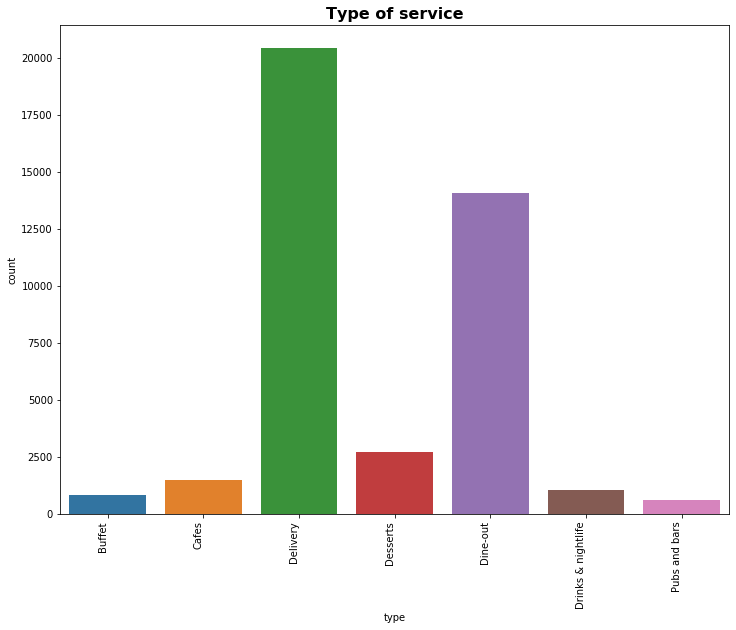

In [87]:
sns.countplot(df['type'])
fig=plt.gcf()
fig.set_size_inches(12,9)
sns.countplot(df['type']).set_xticklabels(sns.countplot(df['type']).get_xticklabels(),rotation= 90,ha = 'right')
plt.title('Type of service',fontsize = 16,fontweight = 'bold')
plt.show()

<b>Type and rating</b>

Text(0, 0.5, 'Type')

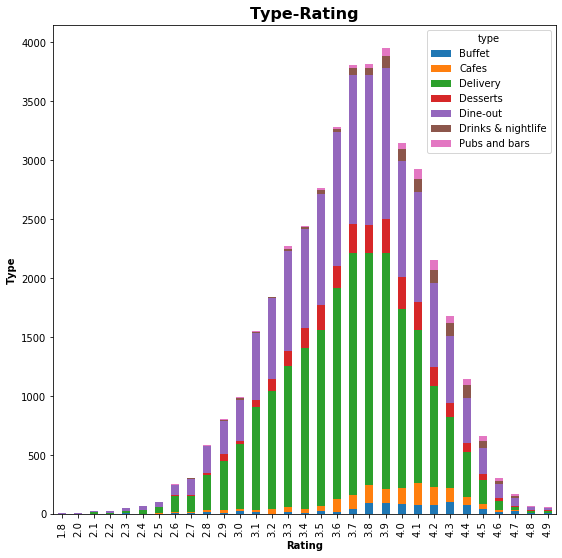

In [88]:
type_plt = pd.crosstab(df['rate'],df['type'])
type_plt.plot(kind = 'bar', stacked = True)
plt.title('Type-Rating', fontsize = 16,fontweight = 'bold')
plt.xlabel('Rating',fontsize = 10,fontweight = 'bold')
plt.ylabel('Type',fontsize = 10,fontweight = 'bold')

<b>Cost of Restaurant</b>

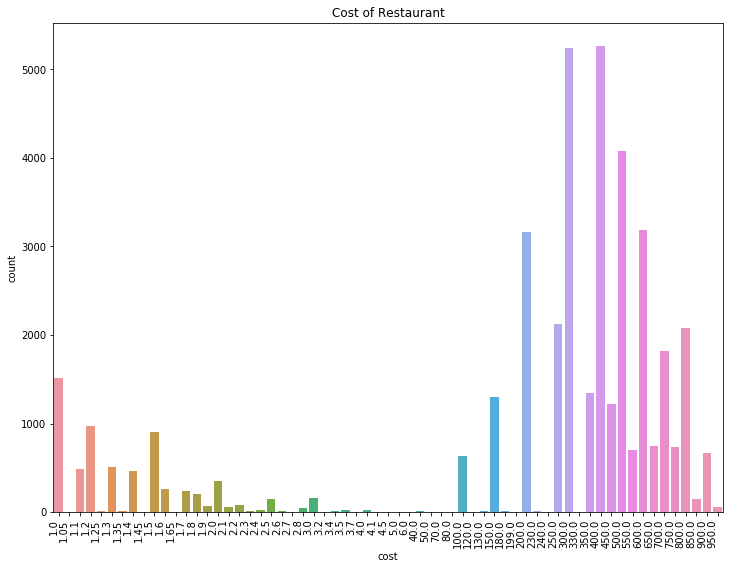

In [90]:
sns.countplot(df['cost'])
fig = plt.gcf()
fig.set_size_inches(12,9)
sns.countplot(df['cost']).set_xticklabels(sns.countplot(df['cost']).get_xticklabels(),rotation=90,ha='right')
plt.title('Cost of Restaurant')
plt.show()

<b>No of restaurants in particular location</b>

Text(0.5, 1.0, 'No of restaurants in particular location')

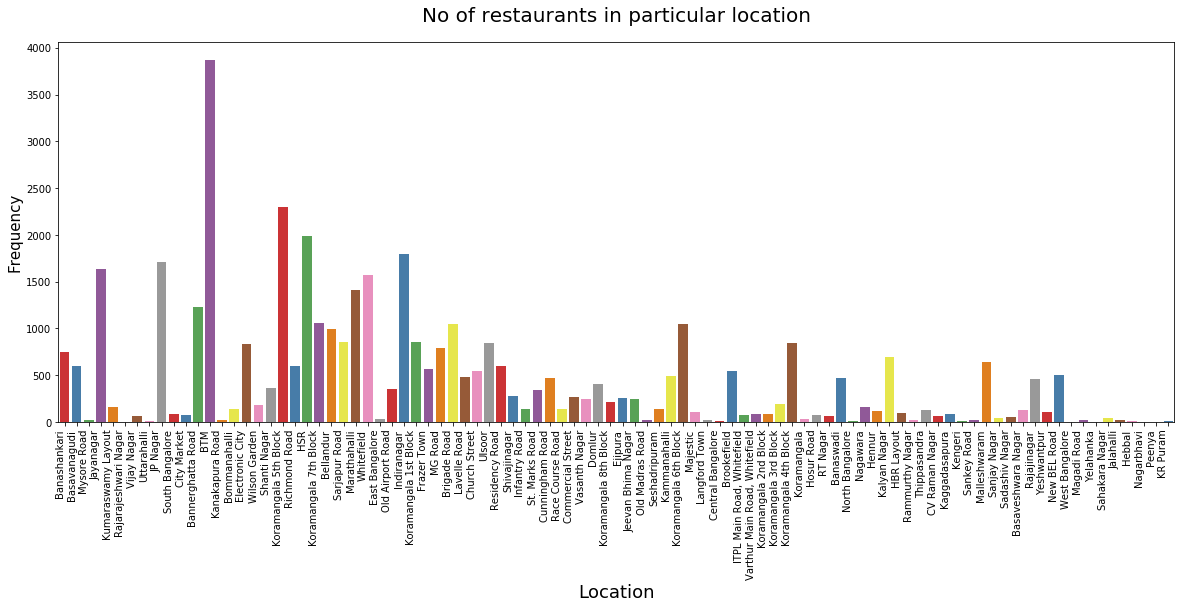

In [96]:
fig = plt.figure(figsize=(20,7))
loc = sns.countplot(x= 'location', data =df,palette = "Set1")
loc.set_xticklabels(loc.get_xticklabels(),rotation = 90,ha='right')
plt.ylabel('Frequency',size=15)
plt.xlabel('Location',size=18)
loc
plt.title('No of restaurants in particular location',size=20,pad=20)

<b>Most Famous Restaurant chains in bangalore</b>

Text(0.5, 0, 'Number of outlets')

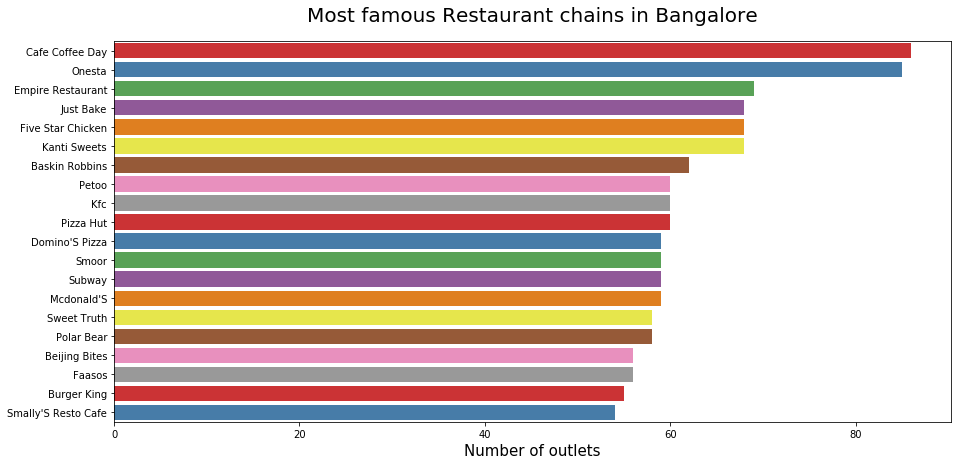

In [101]:
plt.figure(figsize=(15,7))
chains=df['name'].value_counts()[:20]
sns.barplot(x=chains,y=chains.index,palette='Set1')
plt.title('Most famous Restaurant chains in Bangalore',size=20,pad=20)
plt.xlabel('Number of outlets',size=15)